<a href="https://colab.research.google.com/github/Mehul-Agrawal410/AttendanceMate/blob/main/Face_Recognition_With_VGGFace2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

MTCNN(Multi-Task Cascaded Convolutional Neural Networks) ,
YOLO(You look only once) ,

-> To find face encapsulating box

Keras-vggface ->  find face embeddings

In [ ]:
# !pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: c:\users\hrith\appdata\local\programs\python\python310\lib\site-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# !pip install mtcnn

     ---------------------------------------- 2.3/2.3 MB 587.8 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


# Load image from file

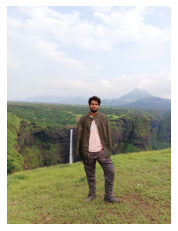

In [ ]:
import matplotlib.pyplot as plt

# Load the image
image = plt.imread('aniket1.jpg')

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [ ]:
import cv2
# Load the image
image = cv2.imread('aniket1.jpg')
# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [ ]:
image.shape    #"imread" converts the image into array

(1280, 964, 3)

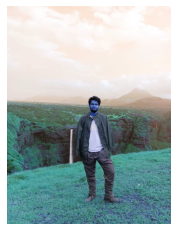

In [ ]:
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [ ]:
image_rgb.shape

(1280, 964, 3)

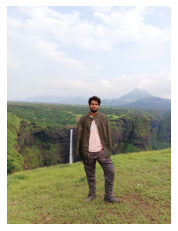

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

# Geting Face box using MTCNN and Face embeddings using VGG Keras

In [ ]:
from mtcnn.mtcnn import MTCNN

In [ ]:
# create the detector(object using MTCNN class), using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(image_rgb)

1/1 [==============================] - 0s 117ms/step


In [ ]:
results

[{'box': [489, 555, 47, 60],
  'confidence': 1.0,
  'keypoints': {'left_eye': (502, 578),
   'right_eye': (526, 579),
   'nose': (514, 590),
   'mouth_left': (502, 599),
   'mouth_right': (524, 601)}},
 {'box': [595, 1073, 26, 30],
  'confidence': 0.7501307129859924,
  'keypoints': {'left_eye': (605, 1085),
   'right_eye': (615, 1084),
   'nose': (612, 1093),
   'mouth_left': (607, 1097),
   'mouth_right': (615, 1096)}}]

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

In [ ]:
# extract the face
face = pixels[y1:y2, x1:x2]

In [ ]:
from PIL import Image
import numpy as np

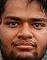

In [ ]:
# resize pixels to the model size
image = Image.fromarray(face)
image

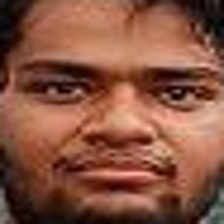

In [ ]:
image = image.resize((224, 224))
image

In [ ]:
face_array = np.asarray(image)
face_array.shape

(224, 224, 3)

In [ ]:
face_array

array([[[ 32,  31,  30],
        [ 32,  31,  29],
        [ 31,  30,  28],
        ...,
        [ 21,  11,  10],
        [ 17,   7,   6],
        [ 15,   5,   4]],

       [[ 31,  30,  29],
        [ 31,  30,  28],
        [ 30,  29,  27],
        ...,
        [ 21,  11,  10],
        [ 17,   7,   6],
        [ 15,   5,   4]],

       [[ 30,  29,  28],
        [ 30,  29,  27],
        [ 29,  28,  26],
        ...,
        [ 20,  10,   9],
        [ 17,   7,   6],
        [ 15,   5,   4]],

       ...,

       [[130, 123, 113],
        [128, 121, 111],
        [124, 117, 108],
        ...,
        [ 99, 115, 107],
        [100, 117, 109],
        [101, 119, 111]],

       [[130, 123, 113],
        [128, 121, 111],
        [124, 117, 107],
        ...,
        [102, 119, 111],
        [104, 121, 113],
        [105, 123, 115]],

       [[130, 123, 113],
        [128, 121, 111],
        [124, 117, 107],
        ...,
        [103, 121, 112],
        [105, 123, 115],
        [106, 125, 117]]

#The ultimate function

In [ ]:

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

1/1 [==============================] - 0s 129ms/step


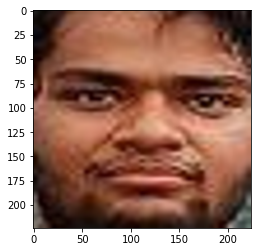

In [ ]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

# load the photo and extract the face
pixels = extract_face('aniket1.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()



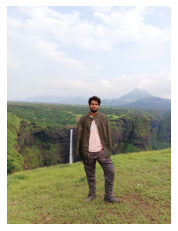

In [ ]:
from matplotlib import pyplot as plt
image = Image.open('aniket1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# example of creating a face embedding
from keras_vggface.vggface import VGGFace
# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_13')>]
Outputs: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


In [ ]:

# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph                       #Same function
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

# load the photo and extract the face
pixels = extract_face('mahenk3.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)                                 #converting it into same format used while training model
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')

# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
 print('%s: %.3f%%' % (result[0], result[1]*100))

1/1 [==============================] - 2s 2s/step
b' Sabrina_Setlur': 7.098%
b' Neethu': 5.988%
b' Samsaya': 4.448%
b' Meera_Vasudevan': 3.239%
b' Chen_Kun': 2.858%


In [ ]:
pixels.shape

(224, 224, 3)

In [ ]:
pixels          #FaceArray

array([[[ 32.,  31.,  30.],
        [ 32.,  31.,  29.],
        [ 31.,  30.,  28.],
        ...,
        [ 21.,  11.,  10.],
        [ 17.,   7.,   6.],
        [ 15.,   5.,   4.]],

       [[ 31.,  30.,  29.],
        [ 31.,  30.,  28.],
        [ 30.,  29.,  27.],
        ...,
        [ 21.,  11.,  10.],
        [ 17.,   7.,   6.],
        [ 15.,   5.,   4.]],

       [[ 30.,  29.,  28.],
        [ 30.,  29.,  27.],
        [ 29.,  28.,  26.],
        ...,
        [ 20.,  10.,   9.],
        [ 17.,   7.,   6.],
        [ 15.,   5.,   4.]],

       ...,

       [[130., 123., 113.],
        [128., 121., 111.],
        [124., 117., 108.],
        ...,
        [ 99., 115., 107.],
        [100., 117., 109.],
        [101., 119., 111.]],

       [[130., 123., 113.],
        [128., 121., 111.],
        [124., 117., 107.],
        ...,
        [102., 119., 111.],
        [104., 121., 113.],
        [105., 123., 115.]],

       [[130., 123., 113.],
        [128., 121., 111.],
        [124., 1

In [ ]:
samples.shape

(1, 224, 224, 3)

In [ ]:
samples

array([[[[ -61.4953   ,  -72.8827   ,  -99.0912   ],
         [ -62.4953   ,  -72.8827   ,  -99.0912   ],
         [ -63.4953   ,  -73.8827   , -100.0912   ],
         ...,
         [ -81.4953   ,  -92.8827   , -110.0912   ],
         [ -85.4953   ,  -96.8827   , -114.0912   ],
         [ -87.4953   ,  -98.8827   , -116.0912   ]],

        [[ -62.4953   ,  -73.8827   , -100.0912   ],
         [ -63.4953   ,  -73.8827   , -100.0912   ],
         [ -64.4953   ,  -74.8827   , -101.0912   ],
         ...,
         [ -81.4953   ,  -92.8827   , -110.0912   ],
         [ -85.4953   ,  -96.8827   , -114.0912   ],
         [ -87.4953   ,  -98.8827   , -116.0912   ]],

        [[ -63.4953   ,  -74.8827   , -101.0912   ],
         [ -64.4953   ,  -74.8827   , -101.0912   ],
         [ -65.4953   ,  -75.8827   , -102.0912   ],
         ...,
         [ -82.4953   ,  -93.8827   , -111.0912   ],
         [ -85.4953   ,  -96.8827   , -114.0912   ],
         [ -87.4953   ,  -98.8827   , -116.0912   ]],

In [ ]:
yhat.shape

(1, 8631)

In [ ]:
results

[[["b' Shanthanu_Bhagyaraj'", 0.6390953],
  ["b' Nandamuri_Kalyan_Ram'", 0.034708608],
  ["b' Mushfiqur_Rahim'", 0.03167375],
  ["b' Silambarasan'", 0.018402705],
  ["b' Puri_Jagannadh'", 0.016288662]]]

Running the example loads the photograph, extracts the single face that we know was present, and then predicts the identity for the face.

The top five highest probability names are then displayed.

# How to Perform Face Verification With VGGFace2

In [ ]:
# create a vggface model
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

94694792/94694792 [==============================] - 26s 0us/step


In [ ]:

# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
 # extract faces
 faces = [extract_face(f) for f in filenames]
 # convert into an array of samples
 samples = asarray(faces, 'float32')
 # prepare the face for the model, e.g. center pixels
 samples = preprocess_input(samples, version=2)
 # create a vggface model
 model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
 # perform prediction
 yhat = model.predict(samples)
 return yhat

In [ ]:

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
 # calculate distance between embeddings
 score = cosine(known_embedding, candidate_embedding)
 if score <= thresh:
     print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
 else:
     print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [ ]:

# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array

# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
 # extract faces
 faces = [extract_face(f) for f in filenames]
 # convert into an array of samples
 samples = asarray(faces, 'float32')
 # prepare the face for the model, e.g. center pixels
 samples = preprocess_input(samples, version=2)
 # create a vggface model
 model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
 # perform prediction
 yhat = model.predict(samples)
 return yhat

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
 # calculate distance between embeddings
 score = cosine(known_embedding, candidate_embedding)
 if score <= thresh:
     print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
 else:
     print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

# define filenames
filenames = ['aniket1.jpg', 'anmol1.jpg',
 'peus1.jpg', 'aniket2.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define aniket
aniket_id = embeddings[0]

#Comparing
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])
is_match(embeddings[0], embeddings[3])

1/1 [==============================] - 1s 960ms/step
>face is NOT a Match (0.510 > 0.500)
>face is NOT a Match (0.557 > 0.500)
>face is a Match (0.384 <= 0.500)


# Using Yolo?

In [ ]:
# pip install yolov5

     ------------------------------------ 953.3/953.3 kB 862.0 kB/s eta 0:00:00
     ---------------------------------------- 88.3/88.3 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 104.0/104.0 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 612.6/612.6 kB 1.8 MB/s eta 0:00:00
  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
     -------------------------------------- 236.8/236.8 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 135.9/135.9 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 79.8/79.8 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 11.0/11.0 MB 2.1 MB/s eta 0:00:00
     ------------------------------------ 163.8/163.8 kB 893.0 kB/s eta 0:00:00
     ----------------------------------


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116951 sha256=9eca95c8b35168ba6e18ff38fa131fb54858828b2774030025f8e9a918fa2d38
  Stored in directory: c:\users\hrith\appdata\local\pip\cache\wheels\c4\eb\6a\1c6d2ad660043768e998bdf9c6a28db2f1b7db3a5825d51e87
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=76c2bdfd3c744b757e960218a0a4f78e1b9cf0e4e30f294b19858f9994569921
  Stored in directory: c:\users\hrith\appdata\local\pip\cache\wheels\46\78\0e\8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built fire wget
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.1.0
    Uninstalling setuptools-58.1.0:
      Successfully uninstalled setuptools-58.1.0
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.7
    Uninstalling pyparsing-3.0.7:
      Successfully uninstalled pyparsing-3.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstall

In [ ]:
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# !pip install -qr requirements.txt

C:\Users\hrith\OneDrive\Desktop\Lecture Files\MachineLearning\Attendence Mate\yolov5


Cloning into 'yolov5'...

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
# Torch is an open-source deep learning library known for its efficient tensor computations
# and automatic differentiation capabilities.
# It provides tools for building and training neural networks, making it widely used in the field of deep learning.

from PIL import Image
from yolov5.models.experimental import attempt_load
from yolov5.utils.general import non_max_suppression
import matplotlib.pyplot as plt
import numpy as np

# Load model
model = attempt_load('yolov5s.pt')

def extract_face(filename, required_size=(224, 224)):
    # Load image
    img = Image.open(filename)

    # Convert image to RGB (if it's RGBA, for example)
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize image to the desired size
    img = img.resize(required_size)

    # Convert image to tensor
    img_tensor = torch.from_numpy(np.array(img)).permute(2, 0, 1).float().unsqueeze(0) / 255.0

    # Inference
    results = model(img_tensor)

    # Apply non-maximum suppression to get the most confident face detection
    results = non_max_suppression(results, conf_thres=0.5, iou_thres=0.5)
#     Non max suppression is a technique used mainly in object
#     detection that aims at selecting the best bounding box out of a set of overlapping boxes.

    # Extract bounding box coordinates
    x1, y1, x2, y2 = results[0][0][:4].tolist()

    # Extract the face
    face = img.crop((x1, y1, x2, y2))

    # Convert face to numpy array
    face_array = np.array(face)

    return face_array



Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients


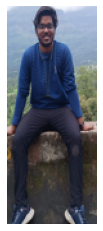

In [ ]:
# Load the photo and extract the face
pixels = extract_face('peus1.jpg')

# Display the image
plt.imshow(pixels)
plt.axis('off')
plt.show()


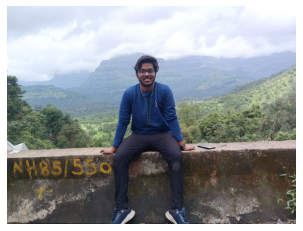

In [ ]:
from matplotlib import pyplot as plt
image = Image.open('peus1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()